In [1]:
%load_ext autoreload
%autoreload 2

import sys
if sys.path[-1] != "..": sys.path.append("..")

from Source.qBN.qBNMC import qBayesNet
from Source.qBN.qBNInference import qInference
from Source.qBN.qBNRT import qRuntime


import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='1b6910ff55c1d3853e5c8e2ca2b0dbbc3b415fb897d26a6c272c63254527581c824aea1180585f706ab8263318f3c553549d136ca32952ef401abb54011eee33'
)

backend = service.get_backend("ibm_brisbane")

# Or save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='1b6910ff55c1d3853e5c8e2ca2b0dbbc3b415fb897d26a6c272c63254527581c824aea1180585f706ab8263318f3c553549d136ca32952ef401abb54011eee33')

In [4]:
bn=gum.fastBN("a->b<-c;b->d;a->e")
bn

(pyAgrum.BayesNet<double>@0x5b7ae1040840) BN{nodes: 5, arcs: 4, domainSize: 32, dim: 10, mem: 160o}

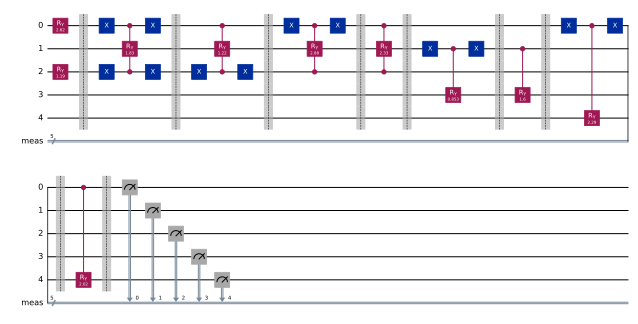

In [6]:
qbn = qBayesNet(bn)
qc = qbn.buildCircuit(add_measure=True)
qc.draw(output="mpl", scale=0.5)

In [7]:
evidence = {"a":0, "c":1}

In [9]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

ie=gum.LazyPropagation(bn)
ie.setEvidence(evidence)
ie.makeInference()
print(f"Evidence: {evidence}")
print(f"Evidence probability: {ie.evidenceProbability()}")
ie.posterior("b")

Evidence: {'a': 0, 'c': 1}
Evidence probability: 0.020927684171450644


(pyAgrum.Potential<double>@0x5b7ae12d0ce0) 
  b                |
0        |1        |
---------|---------|
 0.0170  | 0.9830  |

In [14]:
qinf = qInference(qbn)
qinf.setEvidence(evidence)
qinf.setMaxIter(5000)
qinf.makeInference()

In [15]:
qinf.posterior("b")

(pyAgrum.Potential<double>@0x5b7ae2e57010) 
  b                |
0        |1        |
---------|---------|
 0.0160  | 0.9840  |

In [16]:
qrt = qRuntime(qinf, backend)

In [17]:
qrt.getGateExecutionTime()
print(f"q-Inference log: {qrt.qinf.log}")
qrt.rejectionSamplingRuntime()

A gate transpiled circuit depth: 4143
A gate execution time: 0.00122246 s
G gate transpiled circuit depth: 4021
G gate execution time: 0.0012521000000000001 s
q-Inference log: {'A': 11668, 'G': 22878}


42.90920708